In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x0 = 0
x1 = 90

dur = 2
freq = 50

<IPython.core.display.Javascript object>


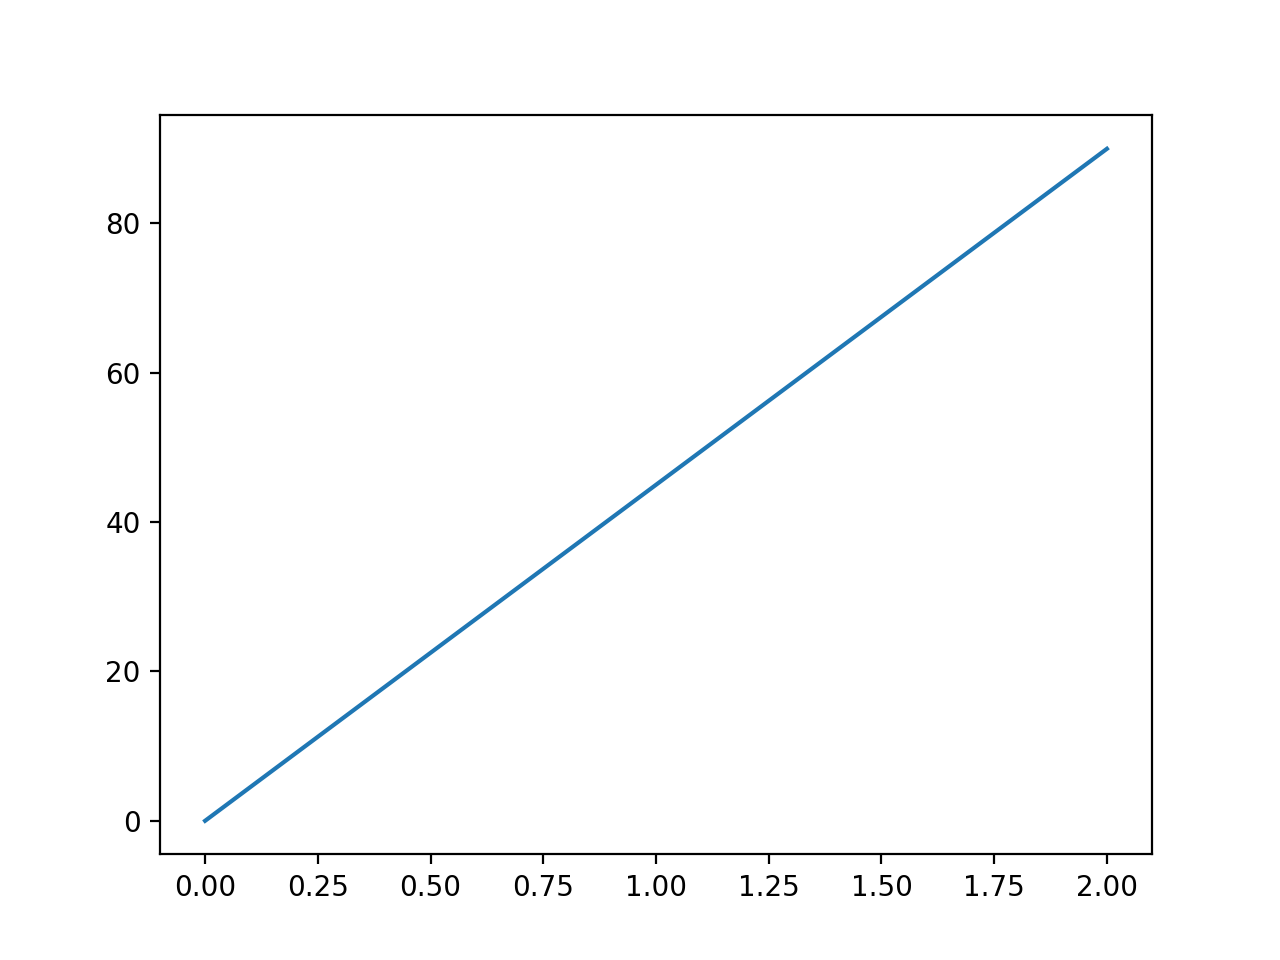

In [3]:
plt.figure()

X = np.linspace(0, 90, freq * dur)
T = np.linspace(0, dur, freq * dur)

plt.plot(T, X)

<IPython.core.display.Javascript object>


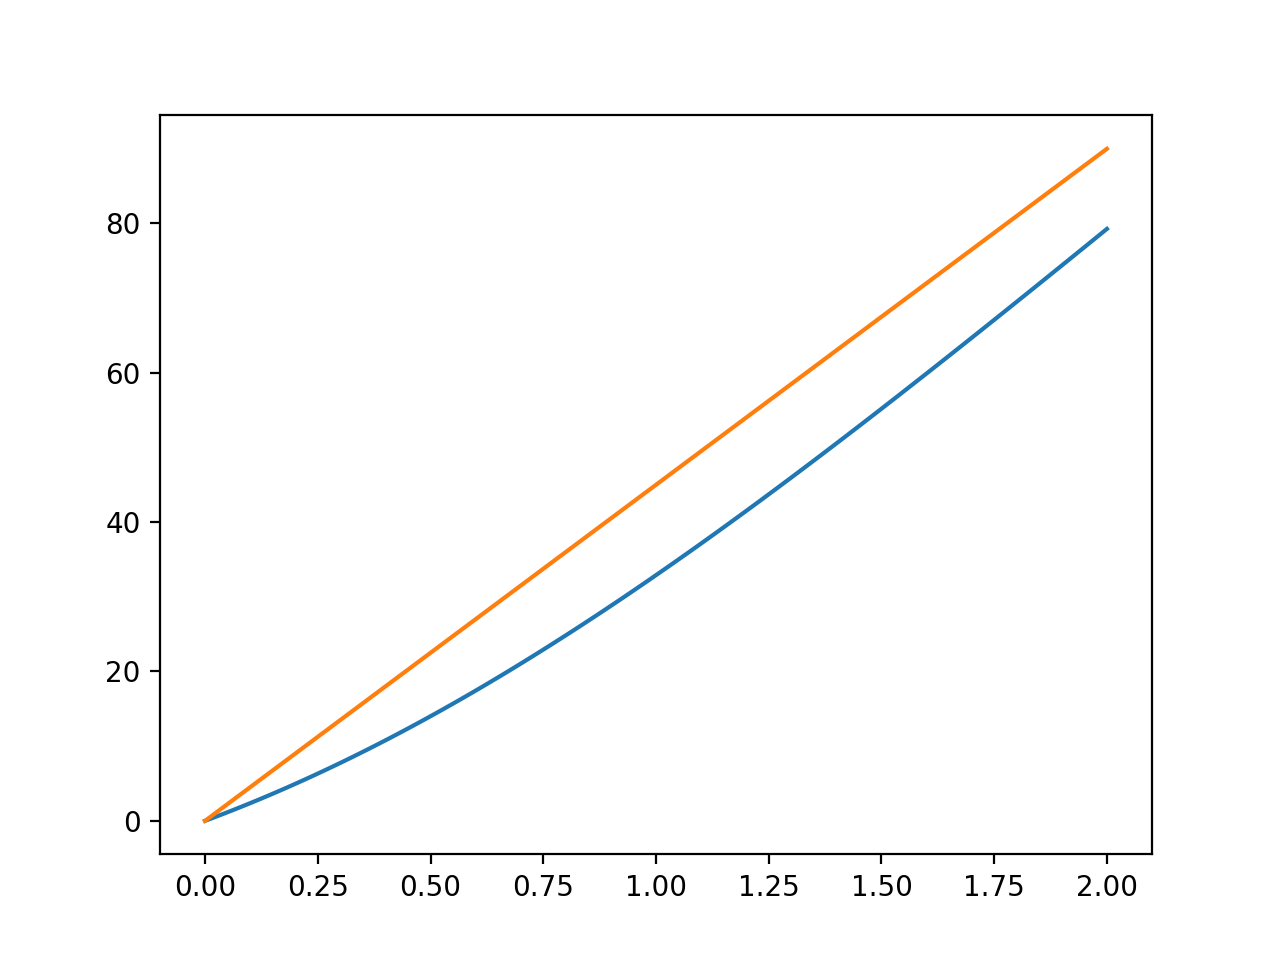

In [4]:
plt.figure()

plt.plot(T, X * 1 / (1 + np.exp(-T)))
plt.plot(T, X)

In [5]:
def minjerk(initial_position, goal_position, duration):
    initial_velocity=0
    final_velocity=0
    initial_acceleration=0
    final_acceleration=0
    
    a0 = initial_position
    a1 = initial_velocity
    a2 = initial_acceleration / 2

    d1, d2, d3, d4, d5 = [duration ** i for i in range(1, 6)]

    A = np.array((
        (d3, d4, d5),
        (3 * d2, 4 * d3, 5 * d4),
        (6 * d1, 12 * d2, 20 * d3)
    ))
    B = np.array((
        goal_position - a0 - (a1 * d1) - (a2 * d2),
        final_velocity - a1 - (2 * a2 * d1),
        final_acceleration - (2 * a2)
    ))
    X = np.linalg.solve(A, B)

    coeffs = [
            a0,
            a1,
            a2,
            X[0],
            X[1],
            X[2]
    ]

    return lambda t: np.sum([
        c * t ** i
        for i, c in enumerate(coeffs)
    ], axis=0)

<IPython.core.display.Javascript object>


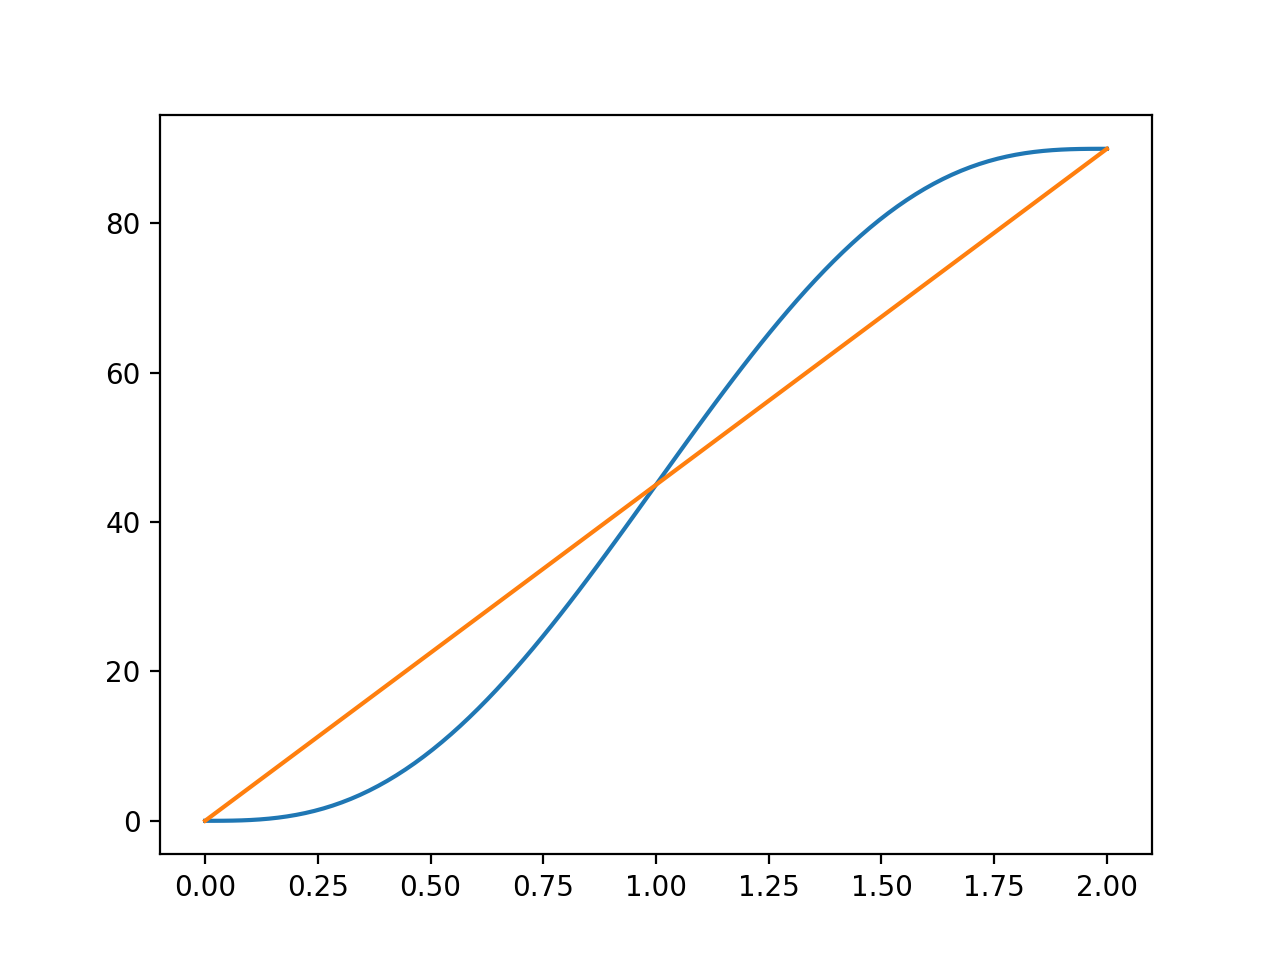

In [7]:
f = minjerk(0, 90, 2)

plt.figure()
plt.plot(T, f(T))
plt.plot(T, X)

In [10]:
import time

t0 = time.time()

while True:
    t = time.time() - t0
    pos = f(t)
    
    motor.goal_position = pos
    time.sleep(0.02)

45.0